<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%203/Modulo_3_Ejercicio_5_kMeans_Segmentacion_Productos_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 5: Aplicación de k-Means para Segmentación de Productos**
#### Uso del algoritmo k-Means para agrupar productos con características similares

### **Introducción**
En este ejercicio, aplicaremos el algoritmo de Clustering k-Means para segmentar productos en función de sus propiedades físicas y de calidad. La segmentación de productos es una técnica útil para identificar patrones en los datos y optimizar procesos de control de calidad.

In [ ]:
# Celda 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset "Control de calidad en empaques de alimentos", que contiene información sobre las propiedades físicas y de calidad de distintos envases utilizados en la industria alimentaria. Este dataset incluye variables relevantes para la segmentación de productos.

In [ ]:
# Celda 2
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_empaques.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado,Proveedor_material,Tipo_envase,Color_material,Defecto_detectado
0,1,52.483571,0.251530,131.236814,166.001783,8.035426,Proveedor_7,Envase_4,Azul,Rasgado
1,2,49.308678,0.142232,98.115434,185.478228,4.851902,Proveedor_4,Envase_1,Transparente,Rasgado
2,3,53.238443,0.228772,141.912131,178.792377,4.524469,Proveedor_6,Envase_1,Azul,Rasgado
3,4,57.615149,0.169038,72.227237,177.167362,5.515039,Proveedor_4,Envase_2,Blanco,Doble capa
4,5,48.829233,0.183630,93.146984,187.675692,4.936259,Proveedor_9,Envase_4,Azul,Sin defecto


In [ ]:
# Celda 3
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_envase            100000 non-null  int64  
 1   Peso_envase          100000 non-null  float64
 2   Espesor_material     100000 non-null  float64
 3   Dureza_superficie    100000 non-null  float64
 4   Temperatura_sellado  100000 non-null  float64
 5   Tiempo_prensado      100000 non-null  float64
 6   Proveedor_material   100000 non-null  object 
 7   Tipo_envase          100000 non-null  object 
 8   Color_material       100000 non-null  object 
 9   Defecto_detectado    100000 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.6+ MB


In [ ]:
# Celda 4
# Resumen estadístico
data.describe()

,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,50.004834,0.200049,103.679283,179.998710,4.979961
std,28867.657797,5.004530,0.049947,30.734946,10.015942,1.048895
min,1.000000,27.671981,-0.018702,11.722281,136.870271,0.170564
25%,25000.750000,46.627531,0.166316,86.973403,173.208950,4.292523
50%,50000.500000,50.013248,0.200025,100.745861,180.025946,4.985470
75%,75000.250000,53.384573,0.233745,114.969594,186.726614,5.675182
max,100000.000000,72.395421,0.428106,474.476149,219.181850,13.090245


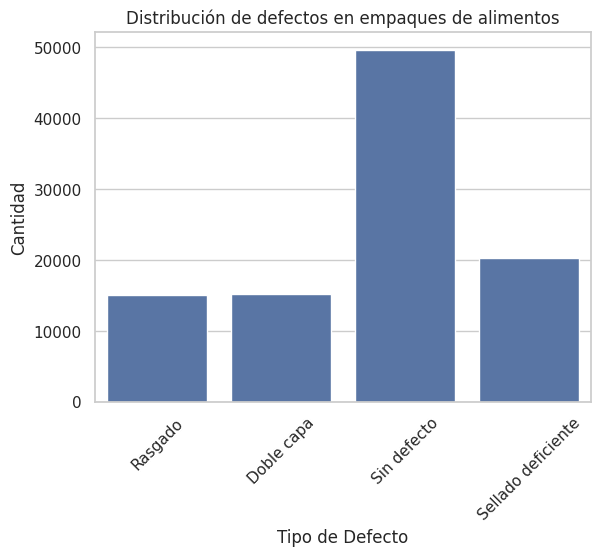

In [ ]:
# Celda 5
# Distribución de la variable 'Defecto_detectado'
sns.countplot(x='Defecto_detectado', data=data)
plt.title('Distribución de defectos en empaques de alimentos')
plt.xlabel('Tipo de Defecto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### **Preprocesamiento de los datos**
Se seleccionan las variables numéricas y se normalizan para mejorar el desempeño del algoritmo de clustering.

In [ ]:
# Celda 6
# Seleccionar solo las variables numéricas para el clustering
numeric_columns = ['Peso_envase', 'Espesor_material', 'Dureza_superficie', 'Temperatura_sellado', 'Tiempo_prensado']
X = data[numeric_columns]

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar la transformación
pd.DataFrame(X_scaled, columns=numeric_columns).head()

,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado
0,0.495301,1.030712,0.896623,-1.397472,2.913047
1,-0.139106,-1.157569,-0.181028,0.547082,-0.122091
2,0.646140,0.575069,1.243960,-0.120442,-0.434262
3,1.520693,-0.620881,-1.023337,-0.282685,0.510138
4,-0.234909,-0.328734,-0.342683,0.766480,-0.041665


### **Aplicación del algoritmo k-Means**
Se aplica el clustering k-Means con un número inicial de clusters k=3 para segmentar los productos.

In [ ]:
# Celda 7
# Aplicar k-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar los primeros resultados
data[['Peso_envase', 'Espesor_material', 'Cluster']].head()

,Peso_envase,Espesor_material,Cluster
0,52.483571,0.251530,1
1,49.308678,0.142232,1
2,53.238443,0.228772,2
3,57.615149,0.169038,0
4,48.829233,0.183630,0


### **Evaluación del clustering**
Se evalúa la calidad del clustering utilizando la inercia y el coeficiente de silueta.

In [ ]:
# Celda 8
# Calcular la inercia y el coeficiente de silueta
inertia = kmeans.inertia_
silhouette = silhouette_score(X_scaled, data['Cluster'])

print(f'Inercia del modelo: {inertia:.2f}')
print(f'Coeficiente de silueta: {silhouette:.2f}')

Inercia del modelo: 391467.12
Coeficiente de silueta: 0.13


### **Visualización de los clusters**
Se visualizan los clusters en gráficos de dispersión utilizando dos variables principales.

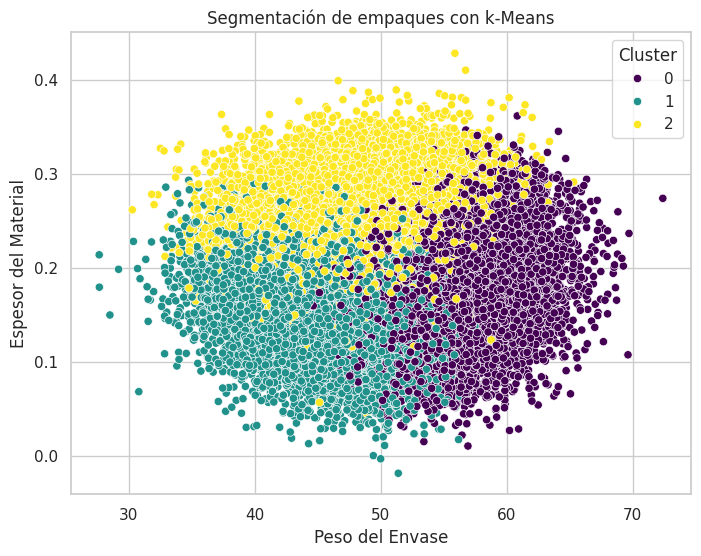

In [ ]:
# Celda 9
# Gráfico de dispersión de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Peso_envase'], y=data['Espesor_material'], hue=data['Cluster'], palette='viridis')
plt.xlabel('Peso del Envase')
plt.ylabel('Espesor del Material')
plt.title('Segmentación de empaques con k-Means')
plt.legend(title='Cluster')
plt.show()

### **Determinación del número óptimo de clusters**
Se utiliza la técnica del codo para encontrar el número adecuado de clusters en los datos.

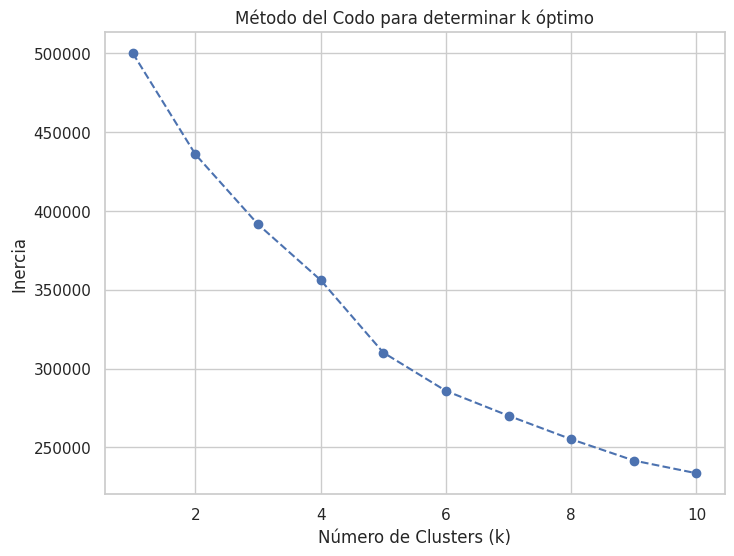

In [ ]:
# Celda 10
# Aplicación del método del codo
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia_values, marker='o', linestyle='dashed')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo')
plt.show()

### **Conclusiones**
En este ejercicio, aplicamos el algoritmo k-Means para segmentar productos en función de sus propiedades físicas y de calidad. Se evaluó la calidad del clustering mediante la inercia y el coeficiente de silueta, además de utilizar el método del codo para determinar el número óptimo de clusters.

Este análisis es útil para mejorar los procesos de control de calidad en la industria alimentaria, permitiendo identificar grupos de productos con características similares y posibles defectos comunes.